In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [78]:
data_08 = pd.read_excel('H1B - Data disclosure/H-1B_Case_Data_FY2008.xlsx')

In [83]:
data_08.columns

Index([u'SUBMITTED_DATE', u'CASE_NO', u'PROGRAM', u'NAME', u'ADDRESS1',
       u'ADDRESS2', u'CITY', u'STATE', u'POSTAL_CODE', u'NBR_IMMIGRANTS',
       u'BEGIN_DATE', u'END_DATE', u'JOB_TITLE', u'DOL_DECISION_DATE',
       u'CERTIFIED_BEGIN_DATE', u'CERTIFIED_END_DATE', u'JOB_CODE',
       u'APPROVAL_STATUS', u'WAGE_RATE_1', u'RATE_PER_1', u'MAX_RATE_1',
       u'PART_TIME_1', u'CITY_1', u'STATE_1', u'PREVAILING_WAGE_1',
       u'WAGE_SOURCE_1', u'YR_SOURCE_PUB_1', u'OTHER_WAGE_SOURCE_1',
       u'WAGE_RATE_2', u'RATE_PER_2', u'MAX_RATE_2', u'PART_TIME_2', u'CITY_2',
       u'STATE_2', u'PREVAILING_WAGE_2', u'WAGE_SOURCE_2', u'YR_SOURCE_PUB_2',
       u'OTHER_WAGE_SOURCE_2', u'WITHDRAWN', u'OCCUPATIONAL_TITLE'],
      dtype='object')

In [79]:
data_09 = pd.read_excel('H1B - Data disclosure/H-1B_Case_Data_FY2009.xlsx')

In [82]:
data_09.columns

Index([u'SUBMITTED_DATE', u'CASE_NO', u'PROGRAM_DESIGNATION', u'EMPLOYER_NAME',
       u'EMPLOYER_ADDRESS1', u'EMPLOYER_ADDRESS2', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_COUNTY', u'EMPLOYER_POSTAL_CODE',
       u'NBR_IMMIGRANTS', u'BEGIN_DATE', u'END_DATE', u'JOB_TITLE',
       u'DOL_DECISION_DATE', u'OCCUPATIONAL_CODE', u'OCCUPATIONAL_TITLE',
       u'APPROVAL_STATUS', u'WAGE_RATE_1', u'RATE_PER_1', u'MAX_RATE_1',
       u'PART_TIME_1', u'CITY_1', u'STATE_1', u'PREVAILING_WAGE_1',
       u'WAGE_SOURCE_1', u'YR_SOURCE_PUB_1', u'OTHER_WAGE_SOURCE_1',
       u'WAGE_RATE__2', u'RATE_PER_2', u'MAX_RATE_2', u'PART_TIME_2',
       u'CITY_2', u'STATE_2', u'PREVAILING_WAGE_2', u'WAGE_SOURCE_2',
       u'YR_SOURCE_PUB_2', u'OTHER_WAGE_SOURCE_2', u'WITHDRAWN'],
      dtype='object')

In [80]:
data_10 = pd.read_excel('H1B - Data disclosure/H-1B_FY2010.xlsx')

In [81]:
data_10.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'LCA_CASE_EMPLOYMENT_START_DATE', u'LCA_CASE_EMPLOYMENT_END_DATE',
       u'LCA_CASE_EMPLOYER_NAME', u'LCA_CASE_EMPLOYER_ADDRESS1',
       u'LCA_CASE_EMPLOYER_ADDRESS2', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO', u'TOTAL_WORKERS',
       u'WORK_LOCATION_CITY1', u'WORK_LOCATION_STATE1', u'PW_1', u'PW_UNIT_1',
       u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1', u'YR_SOURCE_PUB_1',
       u'WORK_LOCATION_CITY2', u'WORK_LOCATION_STATE2', u'PW_2', u'PW_UNIT_2',
       u'PW_SOURCE_2', u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2',
       u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [3]:
data_11 = pd.read_excel('H1B - Data disclosure/H-1B_iCert_LCA_FY2011_Q4.xlsx')

In [4]:
data_11.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [5]:
data_12 = pd.read_excel('H1B - Data disclosure/LCA_FY2012_Q4.xlsx')

In [6]:
data_12.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [7]:
data_13 = pd.read_excel('H1B - Data disclosure/LCA_FY2013.xlsx')

In [61]:
data_13.columnsumns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'Decision_Date',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [8]:
data_14 = pd.read_excel('H1B - Data disclosure/H-1B_FY14_Q4.xlsx')

In [52]:
data_14.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [9]:
data_15 = pd.read_excel('H1B - Data disclosure/H-1B_Disclosure_Data_FY15_Q4.xlsx')

In [56]:
data_15.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS1', u'EMPLOYER_ADDRESS2',
       u'EMPLOYER_CITY', u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE',
       u'EMPLOYER_COUNTRY', u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE',
       u'EMPLOYER_PHONE_EXT', u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY',
       u'AGENT_ATTORNEY_STATE', u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME',
       u'NAIC_CODE', u'TOTAL WORKERS', u'FULL_TIME_POSITION',
       u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY', u'PW_WAGE_LEVEL',
       u'PW_WAGE_SOURCE', u'PW_WAGE_SOURCE_YEAR', u'PW_WAGE_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY', u'WAGE_UNIT_OF_PAY', u'H-1B_DEPENDENT',
       u'WILLFUL VIOLATOR', u'WORKSITE_CITY', u'WORKSITE_COUNTY',
       u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE'],
      dtype='object')

In [10]:
data_16 = pd.read_excel('H1B - Data disclosure/H-1B_Disclosure_Data_FY16.xlsx')

In [62]:
data_16.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE', u'EMPLOYER_COUNTRY',
       u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE', u'EMPLOYER_PHONE_EXT',
       u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY', u'AGENT_ATTORNEY_STATE',
       u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME', u'NAIC_CODE', u'TOTAL_WORKERS',
       u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY',
       u'PW_WAGE_SOURCE', u'PW_SOURCE_YEAR', u'PW_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY_FROM', u'WAGE_RATE_OF_PAY_TO', u'WAGE_UNIT_OF_PAY',
       u'H-1B_DEPENDENT', u'WILLFUL_VIOLATOR', u'WORKSITE_CITY',
       u'WORKSITE_COUNTY', u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE',
       u'ORIGINAL_CERT_DATE'],
      dtype='object')

### Decision Time 

In [36]:
def get_decision_times_for_year(decision_times):
    decision_days = np.array(map(lambda x: x.days ,decision_times))
    return  decision_days[decision_days<=31]

#### Generate decision times

In [100]:
decision_times_08 = data_08['DOL_DECISION_DATE'] - data_08['SUBMITTED_DATE']
decision_times_09 = data_09['DOL_DECISION_DATE'] - data_09['SUBMITTED_DATE']
decision_times_10 = data_10['DECISION_DATE'] - data_10['LCA_CASE_SUBMIT']

In [12]:
decision_times_11 = data_11['DECISION_DATE'] - data_11['LCA_CASE_SUBMIT']
decision_times_12 = data_12['DECISION_DATE'] - data_12['LCA_CASE_SUBMIT']
decision_times_13 = data_13['Decision_Date'] - data_13['LCA_CASE_SUBMIT']
decision_times_14 = data_14['DECISION_DATE'] - data_14['LCA_CASE_SUBMIT']
decision_times_15 = data_15['DECISION_DATE'] - data_15['CASE_SUBMITTED']
decision_times_16 = data_16['DECISION_DATE'] - data_16['CASE_SUBMITTED']

In [37]:
get_decision_times_for_year(decision_times_11)

array([6, 7, 6, ..., 1, 0, 0])

In [101]:
decision_days_08_month = get_decision_times_for_year(decision_times_08)

In [102]:
decision_days_09_month = get_decision_times_for_year(decision_times_09)

In [103]:
decision_days_10_month = get_decision_times_for_year(decision_times_10)

In [38]:
decision_days_11_month = get_decision_times_for_year(decision_times_11)

In [39]:
decision_days_12_month = get_decision_times_for_year(decision_times_12)

In [40]:
decision_days_13_month = get_decision_times_for_year(decision_times_13)

In [41]:
decision_days_14_month = get_decision_times_for_year(decision_times_14)

In [42]:
decision_days_15_month = get_decision_times_for_year(decision_times_15)

In [43]:
decision_days_16_month = get_decision_times_for_year(decision_times_16)

In [126]:
means = [(np.mean(decision_days_08_month), len(decision_days_08_month)),
         (np.mean(decision_days_09_month), len(decision_days_09_month)),
         (np.mean(decision_days_10_month), len(decision_days_10_month)),
         (np.mean(decision_days_11_month), len(decision_days_11_month)),
         (np.mean(decision_days_12_month),len(decision_days_12_month)),
         (np.mean(decision_days_13_month),len(decision_days_13_month)),
         (np.mean(decision_days_14_month),len(decision_days_14_month)),
         (np.mean(decision_days_15_month),len(decision_days_15_month)),
         (np.mean(decision_days_16_month),len(decision_days_16_month))]

In [127]:
np.array(means)

array([[  9.80960153e-03,   4.05623000e+05],
       [  8.14969187e-03,   2.68231000e+05],
       [  5.48494722e+00,   3.35752000e+05],
       [  5.63781116e+00,   3.58857000e+05],
       [  5.65888959e+00,   3.99636000e+05],
       [  5.77147692e+00,   4.11267000e+05],
       [  6.16458193e+00,   4.82714000e+05],
       [  5.98823310e+00,   5.80272000e+05],
       [  5.69396441e+00,   6.03603000e+05]])

In [128]:
means_list = [mean[0] for mean in means]
total = [mean[1] for mean in means]

In [131]:
plt.plot(years,means_list)

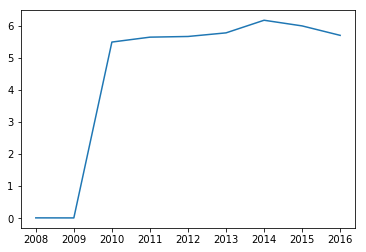

In [132]:
plt.show()

## Applicants Analysis

In [133]:
plt.plot(years, total,'-')

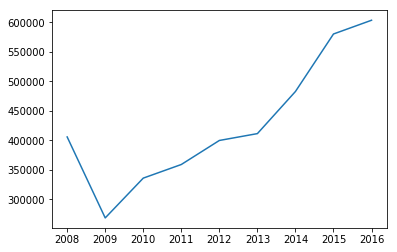

In [134]:
plt.show()

#### Application Status over years

In [136]:
data_08['APPROVAL_STATUS'].unique()

array([u'CERTIFIED', u'DENIED'], dtype=object)

In [137]:
data_09['APPROVAL_STATUS'].unique()

array([u'CERTIFIED', u'DENIED'], dtype=object)

In [138]:
data_10['STATUS'].unique()

array([u'CERTIFIED-WITHDRAWN', u'CERTIFIED', u'WITHDRAWN', u'DENIED'], dtype=object)

In [42]:
decision_days = np.array(map(lambda x: x.days ,decision_times))
decision_days_less_than_a_month = decision_days[decision_days<=31]

In [48]:
plt.hist(decision_days, np.arange(31,max(decision_days), 50))
plt.show()

In [31]:
np.mean(decision_days)

36.918586852071677

In [46]:
len(decision_days) - len(decision_days_less_than_a_month)

31008

In [10]:
len(data_13[u'LCA_CASE_SOC_CODE'].unique())

1116

In [14]:
data_13[[u'LCA_CASE_EMPLOYMENT_START_DATE',u'LCA_CASE_EMPLOYMENT_END_DATE']]

,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE
0,2013-02-01,2016-01-31 00:00:00
1,2010-06-22,2013-01-31 00:00:00
2,2012-10-20,2015-10-20 00:00:00
3,2012-05-01,2013-04-30 00:00:00
4,2011-08-17,2014-08-16 00:00:00
5,2010-09-20,2013-09-19 00:00:00
6,2010-11-22,2013-11-22 00:00:00
7,2010-09-20,2013-09-19 00:00:00
8,2011-10-01,2014-10-01 00:00:00
9,2012-10-01,2015-09-30 00:00:00


In [16]:
visa_class = data_13.groupby(['VISA_CLASS'])

In [25]:
visa_class.count()

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,Decision_Date,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,LCA_CASE_EMPLOYER_STATE,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
VISA_CLASS,,,,,,,,,,,,,,,,,,,,,
E-3 Australian,7707,7707,7707,7707,7707,7707,7707,7707,7706,7704,...,7246,7697,431,431,430,430,430,408,430,7707
H-1B,433604,433604,433604,433604,433489,433489,433489,433486,433486,433479,...,421901,433454,65375,65392,65389,65390,65397,64342,65388,433488
H-1B1 Chile,442,442,442,442,442,442,442,442,442,442,...,420,441,30,30,30,30,30,29,30,442
H-1B1 Singapore,520,520,520,520,520,520,520,520,520,519,...,505,520,33,33,33,33,33,33,33,520
Select Visa Classification,2,2,2,2,0,0,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data_13.loc[data_13['VISA_CLASS']=='E-3 Australian']

7707

In [38]:
len(data_13['LCA_CASE_JOB_TITLE'].unique())

68197

In [39]:
job_title = data_13.groupby(['LCA_CASE_JOB_TITLE'])

In [41]:
job_title.count().sort_values('LCA_CASE_NUMBER')

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,Decision_Date,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
LCA_CASE_JOB_TITLE,,,,,,,,,,,,,,,,,,,,,
"""TEST"" SENIOR SCIENTIST",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, EXECUTIVE DEVELOPMENT",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, FLASH",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, FOAM & TRIM BUSINESS UNIT",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, GROUP RISK",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, HOSPITALITY SOLUTIONS",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, INT'L MINISTRIES/EXECUTIVE SECRET",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"PROGRAM MANAGER, ISSLP LAT. AMERICA/COMMUNITY BASE",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, MALARIA",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
